# Calculating a PSF for WFIRST Wide Field Instrument

First, we set up the notebook by importing the packages we use:

*(Note: click in a cell and use **Shift + Enter** to run it)*

In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize'] = (16, 6)
from matplotlib import pyplot as plt
import numpy as np

from astropy.io import fits, ascii

import webbpsf
import poppy
import webbpsf.wfirst

WebbPSF log messages of level INFO and above will be shown.
WebbPSF log outputs will be directed to the screen.


/Users/jlong/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Each instrument in WebbPSF is represented as a Python `class`, and the Wide Field Instrument model is in `webbpsf.wfirst.WFI`. We need to instantiate one to work with:

In [2]:
# Initialize a new Wide Field Imager model instance to configure
wfi = webbpsf.wfirst.WFI()

# Using the notebook interface

There's a notebook-friendly interface for the Wide Field Instrument PSF model. Invoke it by running the following cell, then experiment with the different options.

After you calculate a PSF, a button will appear to download your most recent calculation output in FITS format. (WebbPSF also offers tools to analyze PSFs within the notebook, which are described below under *Using the API interface*.)

In [3]:
webbpsf.wfirst.show_notebook_interface(wfi)

# Using the API interface

Alternatively, you can configure the WFI instance yourself in Python. The `calcPSF` method returns a FITS HDUList (from `astropy.io.fits`), which you can write out to a file or perform further analysis on in the notebook.

INFO:webbpsf:Setting up PSF calculation for WFI
INFO:poppy: monochromatic calculation requested.
INFO:webbpsf:Using the unmasked WFI pupil shape based on wavelengths requested
INFO:webbpsf:PSF calc using fov_arcsec = 5.000000, oversample = 4, number of wavelengths = 1
INFO:webbpsf:Creating optical system model:
INFO:poppy:Initialized OpticalSystem: WFIRST+WFI
INFO:poppy:WFIRST Pupil: Loaded amplitude transmission from /Users/jlong/software/webbpsf-data/AFTA_WFC_C5_Pupil_Shortwave_Norm_2048px.fits
INFO:poppy:WFIRST Pupil: Loaded OPD from /Users/jlong/software/webbpsf-data/upscaled_HST_OPD.fits
INFO:poppy:Added pupil plane: WFIRST Pupil
INFO:poppy:Added pupil plane: Field Dependent Aberration (SCA01)
INFO:poppy:Added detector: WFI detector, with pixelscale=0.110000 arcsec/pixel and oversampling=4
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 1.2e-06 meters
INFO:webbpsf:Omitting piston/tip/tilt
INFO:poppy:  Calculation completed in 15.968 s
INFO:poppy:

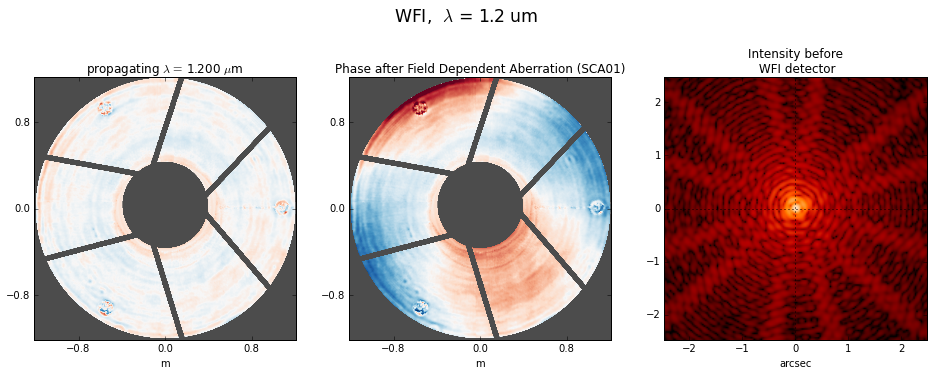

In [4]:
# Alternatively, you can configure the WFI instance
# yourself in Python and perform a calculation
mono_psf = wfi.calcPSF(monochromatic=1.2e-6, display=True)

Now you have the calculation result in the `mono_psf` variable, and can use various utility functions in WebbPSF to analyze it. The FITS object has an extension called `OVERSAMP` with each pixel split according to the default oversampling factor (4), and an extension called `DET_SAMP` with that image binned down to detector pixels.

In [5]:
mono_psf.info()

Filename: (No file associated with this HDUList)
No.    Name         Type      Cards   Dimensions   Format
0    OVERSAMP    PrimaryHDU      38   (180, 180)   float64   
1    DET_SAMP    ImageHDU        40   (45, 45)     float64   


Let's plot the PSF in detector pixels:

/Users/jlong/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


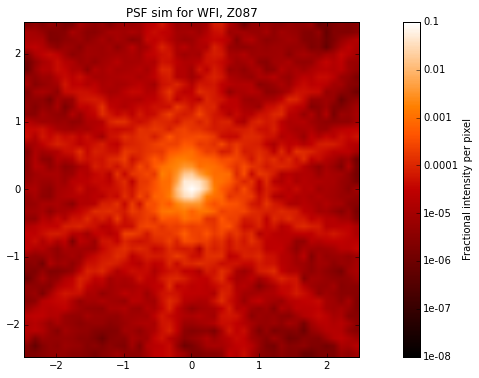

In [6]:
webbpsf.display_PSF(mono_psf, ext='DET_SAMP')

WebbPSF also includes functions for measuring EE, profiles, and centroids (described in the [WebbPSF documentation](http://pythonhosted.org/webbpsf/api_reference.html#functions) and the [POPPY documentation](http://pythonhosted.org/poppy/api.html#functions)). Below we measure the encircled energy for the monochromatic PSF:

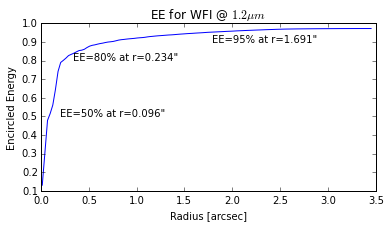

In [7]:
plt.figure(figsize=(6,3))
webbpsf.display_EE(mono_psf)
plt.title("EE for WFI @ $1.2\mu m$")

If necessary, the FITS object containing the PSF can be written out to a file and downloaded to your computer.

In [8]:
mono_psf.writeto('./mono_psf_1.2um.fits', clobber=True)

Files saved from the notebook (provided the working directory is unchanged) will be available at the URL `files/your_filename.fits` relative to this page.

For example, view the source for this link: <a href="files/mono_psf_1.2um.fits">Download mono_psf_1.2um.fits</a>

# What next?

Keep working in this notebook, if you like! For reference, there's always a pristine copy to refer back to in the WebbPSF GitHub repository ([mperrin/webbpsf](https://github.com/mperrin/webbpsf)).

  * **Review the [WebbPSF documentation](https://pythonhosted.org/webbpsf/) and the [POPPY documentation](https://pythonhosted.org/poppy/)**
  * **Report any issues to us on GitHub** — 
    WebbPSF and POPPY are developed on GitHub: [mperrin/webbpsf](https://github.com/mperrin/webbpsf) and [mperrin/poppy](https://github.com/mperrin/poppy) respectively.
    The best way to report bugs is through the GitHub issue trackers: [WebbPSF](https://github.com/mperrin/webbpsf/issues) or [POPPY](https://github.com/mperrin/poppy/issues). (We also welcome pull requests from the community, if there's functionality you think should be included!)
  * **Sign up for WebbPSF update announcements** —
    This is entirely optional, but you may wish to sign up to the mailing list webbpsf-users@stsci.edu. This is a low-traffic moderated announce-only list, to which we will periodically post announcements of updates to this software. To subscribe, visit the [maillist.stsci.edu](http://maillist.stsci.edu) server